# 2.1 LU decomposition

The $LU$ decomposition is an improvement on the Gaussian elimination technique which decomposes a matrix into a lower triangular matrix $L$ and an upper triangular matrix $U$. One of the main applications of this decomposition is solving linear systems. Thus, solving the linear system $Ax = b$ where $A$ is a $n\times n$ matrix and $x$ and $b$ are vectors of length $n$ can be as expressed as follows.

$$Ax=(LU)x=L(Ux)=b,$$ 	
This is equivalent to
\begin{align*}
\begin{cases}
Ly = b,\\
Ux = y.
\end{cases}
\end{align*}
Solving the last two linear systems are equivalent to the forward
elimination and back substitution, respectively.

Let $A$ be a square matrix. Then, $A$ can be decomposed into $L$ and $U$ as follows,


\begin{align*}
\begin{bmatrix}a_{11} & a_{12} & \dots & a_{1n} \\ a_{21} & a_{22} & \dots & a_{2n} \\
\vdots & \vdots &   & \vdots \\ a_{n1} & a_{n2} & \dots & a_{nn} \end{bmatrix}=
\begin{bmatrix}1 & 0 & \dots & 0 \\ l_{21} & 1 & \dots & 0 \\
\vdots & \vdots &   & \vdots \\ l_{n1} & l_{n2} & \dots & 1 \end{bmatrix}
\begin{bmatrix}u_{11} & u_{12} & \dots & u_{1n} \\ 0 & u_{22} & \dots & u_{2n} \\
\vdots & \vdots &   & \vdots \\ 0 & 0 & \dots & u_{nn} \end{bmatrix}.
\end{align*}

Solving this system, $u_{ij}$ and $l_{ij}$ can be identified as follows
\begin{align*}
u_{ij} &= a_{ij} - \sum_{k=1}^{i-1} u_{kj}l_{ik},\\
l_{ij} &=  \frac{1}{u_{jj}} \left(a_{ij} - \sum_{k=1}^{j-1} u_{kj}l_{ik} \right).
\end{align*}

See [1] for the full derivation of this algorithm. Furthermore, we can prepare a Python code using the above algorithm.

In [1]:
import numpy as np
import pandas as pd

def myLU(A):
    '''
    Assuming that no row interchanges is needed, this function
    computes a unit lower triangular matrix L, and an upper
    triangular matrix U such that LU = A
    '''
    n = A.shape[1]
    # Consider U as a copy matrix A
    U = A.copy().astype(float)
    # loop through the columns of U from 1st to the one before last
    for j in range(0, n-1):
        # define the multipliers for Gauss elimination and store them
        # in the lower part of the j-th column of L
        U[j+1:n,j] = U[j+1:n,j]/U[j,j];
        # perform the j-th step of Gauss elimination one row at a time
        for i in range(j+1, n):
            # [i-th row of U] - [(i,j)-multiplier]*[j-th row of U]
            U[i,j+1:n] = U[i,j+1:n]-U[i,j]*U[j,j+1:n]
    # separate L from U and zeros the entries of U below the diagonal
    L = np.tril(U,-1)+ np.eye(n, dtype=float)
    U = np.triu(U)
    return L, U

<font color='Blue'><b>Example</b></font>: Apply $LU$ decomposition on the following matrix.
$$A = \left[\begin{array}{cccc} 7 & 3 & -1 & 2\\ 3 & 8 & 1 & -4\\ -1 & 1 & 4 & -1\\ 2 & -4 & -1 & 6 \end{array}\right]$$

We have,

<IPython.core.display.Latex object>

array([[ 7,  3, -1,  2],
       [ 3,  8,  1, -4],
       [-1,  1,  4, -1],
       [ 2, -4, -1,  6]])

<IPython.core.display.Latex object>

array([[ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.42857143,  1.        ,  0.        ,  0.        ],
       [-0.14285714,  0.21276596,  1.        ,  0.        ],
       [ 0.28571429, -0.72340426,  0.08982036,  1.        ]])

<IPython.core.display.Latex object>

array([[ 7.        ,  3.        , -1.        ,  2.        ],
       [ 0.        ,  6.71428571,  1.42857143, -4.85714286],
       [ 0.        ,  0.        ,  3.55319149,  0.31914894],
       [ 0.        ,  0.        ,  0.        ,  1.88622754]])

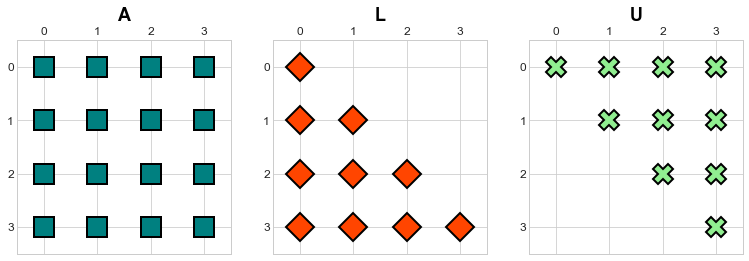

In [2]:
from IPython.display import display, Latex
A = np.array([ [7, 3, -1, 2], [3, 8, 1, -4], [-1, 1, 4, -1], [2, -4, -1, 6] ])
L, U = myLU(A)
display(Latex(r'A ='))
display(A)
display(Latex(r'L ='))
display(L)
display(Latex(r'U ='))
display(U)

import scipy.sparse as sps

## matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon
from matplotlib.font_manager import FontProperties

# plt setting
plt.style.use('seaborn-whitegrid')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
%matplotlib inline

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4))
ax = ax.ravel()
font = FontProperties()
font.set_weight('bold')
_ = ax[0].spy(sps.csr_matrix(A), aspect='equal', markersize= 20, color = 'Teal', markeredgecolor = 'Black',
              markeredgewidth = 2)
_ = ax[0].set_title('A', fontproperties=font, fontsize = 18)
_ = ax[1].spy(sps.csr_matrix(L), aspect='equal', markersize= 20, color = 'OrangeRed', markeredgecolor = 'Black',
              marker ='D', markeredgewidth = 2)
_ = ax[1].set_title('L', fontproperties=font, fontsize = 18)
_ = ax[2].spy(sps.csr_matrix(U), aspect='equal', markersize= 20, color = 'LightGreen', markeredgecolor = 'Black',
              marker ='X', markeredgewidth = 2)
_ = ax[2].set_title('U', fontproperties=font, fontsize = 18)

Note that we could get a similar results using Scipy LU function, [```scipy.linalg.lu```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu.html).

In [3]:
import scipy.linalg as linalg
P, L, U = linalg.lu(A)
display(Latex(r'L ='))
print(L)
display(Latex(r'U ='))
print(U)

<IPython.core.display.Latex object>

[[ 1.          0.          0.          0.        ]
 [ 0.42857143  1.          0.          0.        ]
 [-0.14285714  0.21276596  1.          0.        ]
 [ 0.28571429 -0.72340426  0.08982036  1.        ]]


<IPython.core.display.Latex object>

[[ 7.          3.         -1.          2.        ]
 [ 0.          6.71428571  1.42857143 -4.85714286]
 [ 0.          0.          3.55319149  0.31914894]
 [ 0.          0.          0.          1.88622754]]


Note that in the above algorithm $P$ is a permutation matrix that can perform a **partial** and **full pivoting**.

## 2.1.1 Solving Linear systems using LU decomposition

We can solve the linear system $Ax=b$ for $x$ using $LU$ decomposition. To demonstrate this, we use the following example,

Let
\begin{algin*}
A=\left[\begin{array}{cccc} 2 & 1 & 1 & 0\\ 1 & -2 & 0 & 1\\ 0 & 1 & 3 & 0\\ -1 & 0 & 0 & 4 \end{array}\right]
\quad \text{and}\quad
b=\left[\begin{array}{c} 7\\ 1\\ 11\\ 15 \end{array}\right].
\end{algin*}
Then, this linear system can be also expressed as
\begin{algin*}Ax=(LU)x=L(Ux)=b,\end{algin*}
we have,

In [4]:
A = np.array([[2,1,1,0],[1,-2,0,1],[0,1,3,0],[-1,0,0,4]])
b = np.array([[7],[1],[11],[15]])
P, L, U = linalg.lu(A)
display(Latex(r'L ='))
print(L)
display(Latex(r'U ='))
print(U)

<IPython.core.display.Latex object>

[[ 1.          0.          0.          0.        ]
 [ 0.5         1.          0.          0.        ]
 [ 0.         -0.4         1.          0.        ]
 [-0.5        -0.2         0.14285714  1.        ]]


<IPython.core.display.Latex object>

[[ 2.          1.          1.          0.        ]
 [ 0.         -2.5        -0.5         1.        ]
 [ 0.          0.          2.8         0.4       ]
 [ 0.          0.          0.          4.14285714]]


Now we can solve the following linear systems instead
$$\begin{cases}
Ly=b,\\
Ux=y.
\end{cases}$$

In [5]:
# solving Ly=b for y
y = linalg.solve(L, b)
display(Latex(r'y ='))
print(y)

<IPython.core.display.Latex object>

[[ 7.        ]
 [-2.5       ]
 [10.        ]
 [16.57142857]]


In [6]:
# solving Ux=y for x
x = linalg.solve(U, y)
display(Latex(r'x ='))
print(x)

<IPython.core.display.Latex object>

[[1.]
 [2.]
 [3.]
 [4.]]


Let's now solve the linear system directly and compare the results.

In [7]:
x1 = linalg.solve(A, b)
display(Latex(r'x ='))
print(x1)

<IPython.core.display.Latex object>

[[1.]
 [2.]
 [3.]
 [4.]]


***
# References
1. Allaire, Grégoire, et al. Numerical linear algebra. Vol. 55. New York: Springer, 2008.
1. Burden, Richard L., and J. Douglas Faires. "Numerical analysis 8th ed." Thomson Brooks/Cole (2005).
1. Atkinson, Kendall E. An introduction to numerical analysis. John wiley & sons, 2008.
1. Khoury, Richard, and Douglas Wilhelm Harder. Numerical methods and modelling for engineering. Springer, 2016.
***